In [1]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format='retina'
%matplotlib inline

In [2]:
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

from pygeotools.lib import iolib,geolib,malib,filtlib
from imview import pltlib

import contextily as ctx


In [3]:
#from https://gadm.org/download_country.html
nepal_shp_fn = 'gadm41_NPL.gpkg'
nepal_shp = gpd.read_file(nepal_shp_fn)
langtang_bbox = gpd.read_file('langtang_area_bbox.geojson')
sagarmatha_bbox = gpd.read_file('sagarmatha_bbox.geojson')

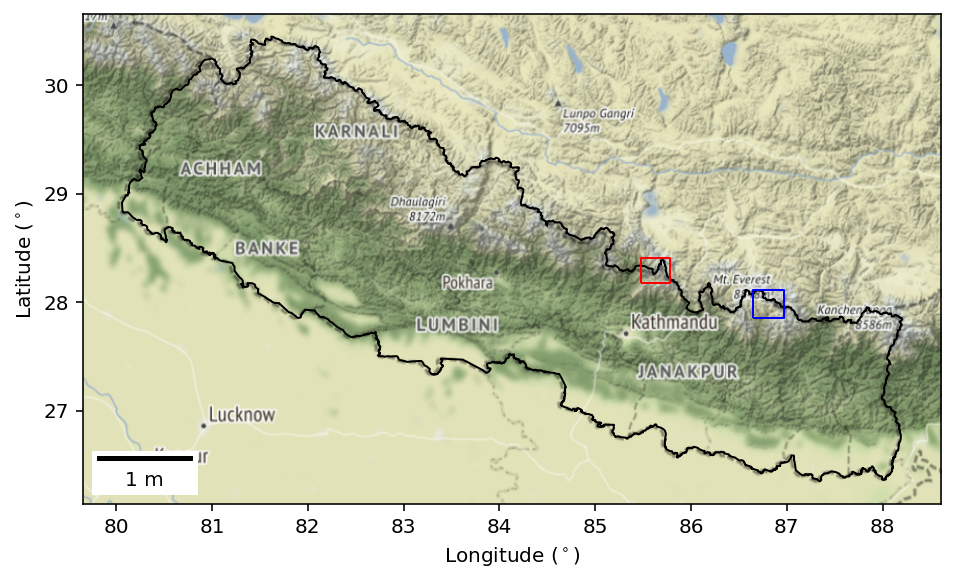

In [5]:
f,ax = plt.subplots(figsize=(10,4.5))
nepal_shp.plot(ax=ax,facecolor='None',edgecolor='k')
ctx.add_basemap(ax,crs='EPSG:4326',attribution=False,zoom=7)
langtang_bbox.plot(ax=ax,facecolor='None',edgecolor='red')
sagarmatha_bbox.plot(ax=ax,facecolor='None',edgecolor='blue')
ax.set_xlabel('Longitude ($^\circ$)')
ax.set_ylabel('Latitude ($^\circ$)')
pltlib.add_scalebar(ax,res=1,location='lower left')
f.savefig('Study_area_figure1.tif',dpi=300,bbox_inches='tight', pad_inches=0.1)


In [6]:
hma_aea_crs = '+proj=aea +lat_0=36 +lon_0=85 +lat_1=25 +lat_2=47 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs'

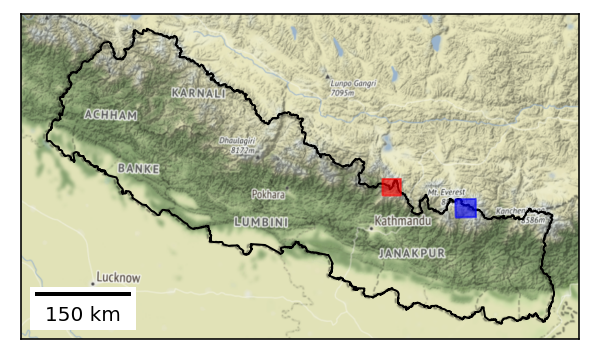

In [7]:
f,ax = plt.subplots(figsize=(5,3))
nepal_shp.to_crs(hma_aea_crs).plot(ax=ax,facecolor='None',edgecolor='k')
ctx.add_basemap(ax,crs=hma_aea_crs,attribution=False,zoom=7)
langtang_bbox.to_crs(hma_aea_crs).plot(ax=ax,facecolor='red',edgecolor='red',alpha=0.6)
sagarmatha_bbox.to_crs(hma_aea_crs).plot(ax=ax,facecolor='blue',edgecolor='blue',alpha=0.6)
ax.set_xticks([])
ax.set_yticks([])
#ax.set_xlabel('Longitude ($^\circ$)')
#ax.set_ylabel('Latitude ($^\circ$)')
pltlib.add_scalebar(ax,res=1,location='lower left')
f.savefig('Study_area_figure1_alt_small.tif',dpi=300,bbox_inches='tight', pad_inches=0.1)

In [9]:
langtang_shp = gpd.read_file('glac_shp/lagdz_shp_fn/RGI60-15.04121_shp.gpkg')
lirung_shp = gpd.read_file('glac_shp/lagdz_shp_fn/RGI60-15.04045_shp.gpkg')

/home/shashank/miniconda3/envs/bhushanGDAL3/lib/python3.9/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/home/shashank/miniconda3/envs/bhushanGDAL3/lib/python3.9/site-packages/pyproj/crs/crs.py:306: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(" ".join((projstring, projkwargs)))
/tmp/ipykernel_103109/1594502611.py:19: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-p

85.8
[85.5 85.6 85.7 85.8]


/tmp/ipykernel_103109/1594502611.py:49: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  y_tick_loc_init = np.array([transform(out_proj, in_proj, xy[0], xy[1])[1] for xy in y_tick_loc_out])


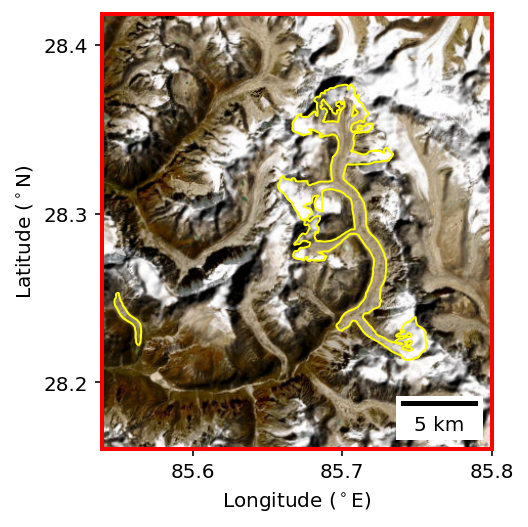

In [18]:
f,ax = plt.subplots(figsize=(5,4))
langtang_bbox.to_crs('EPSG:32645').plot(ax=ax,edgecolor='None',facecolor='None')
ctx.add_basemap(ax,crs='EPSG:32645',attribution=False,source=ctx.providers.Esri.WorldImagery,zoom=11)
pltlib.add_scalebar(ax=ax,res=1)
# Set the borders to a given color...
#https://stackoverflow.com/questions/7778954/elegantly-changing-the-color-of-a-plot-frame-in-matplotlib
#ax.tick_params(color='red', labelcolor='red')
langtang_shp.to_crs('EPSG:32645').plot(ax=ax,edgecolor='yellow',facecolor='None',linewidth=1)
lirung_shp.to_crs('EPSG:32645').plot(ax=ax,edgecolor='yellow',facecolor='None',linewidth=1)
lw=2
ax.spines['left'].set_linewidth(lw)
ax.spines['right'].set_linewidth(lw)
ax.spines['top'].set_linewidth(lw)
ax.spines['bottom'].set_linewidth(lw)
for spine in ax.spines.values():
    spine.set_edgecolor('red')
plot_geo_grid(ax=ax,ne_label=False,verbose=False,maintain_extent=True,
              in_proj='EPSG:32645',lat_in=0.1,lon_in=0.1)
xlim = ax.get_xlim()
ax.set_xlim(xlim[0]+7000,xlim[1])
f.savefig('langtang.tif',dpi=300,bbox_inches='tight', pad_inches=0.1)

In [13]:
khumbu_shp = gpd.read_file('glac_shp/lagdz_shp_fn/RGI60-15.03733_shp.gpkg')
ngozumpa_shp = gpd.read_file('glac_shp/lagdz_shp_fn/RGI60-15.03473_shp.gpkg')
imja_shp = gpd.read_file('glac_shp/lagdz_shp_fn/RGI60-15.03743_shp.gpkg')
changri_shp = gpd.read_file('glac_shp/lagdz_shp_fn/RGI60-15.03734_shp.gpkg')
black_changri_shp = gpd.read_file('agu/Black_changri_with_accumulation_area2.shp')

/home/shashank/miniconda3/envs/bhushanGDAL3/lib/python3.9/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/home/shashank/miniconda3/envs/bhushanGDAL3/lib/python3.9/site-packages/pyproj/crs/crs.py:306: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(" ".join((projstring, projkwargs)))
/tmp/ipykernel_103109/1594502611.py:19: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-p

87.0
[86.7 86.8 86.9 87. ]


/tmp/ipykernel_103109/1594502611.py:49: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  y_tick_loc_init = np.array([transform(out_proj, in_proj, xy[0], xy[1])[1] for xy in y_tick_loc_out])


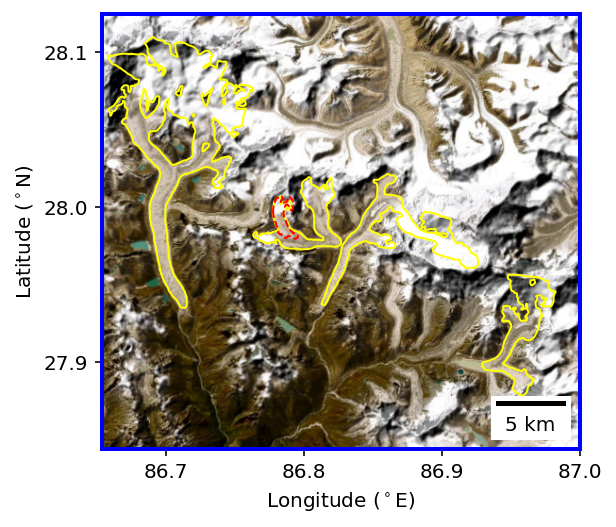

In [22]:
f,ax = plt.subplots(figsize=(5,4))
sagarmatha_bbox.to_crs('EPSG:32645').plot(ax=ax,edgecolor='None',facecolor='None')
ctx.add_basemap(ax,crs='EPSG:32645',attribution=False,source=ctx.providers.Esri.WorldImagery,zoom=11)
pltlib.add_scalebar(ax=ax,res=1)
# Set the borders to a given color...
#https://stackoverflow.com/questions/7778954/elegantly-changing-the-color-of-a-plot-frame-in-matplotlib
#ax.tick_params(color='red', labelcolor='red')
khumbu_shp.to_crs('EPSG:32645').plot(ax=ax,edgecolor='yellow',facecolor='None',linewidth=1)
ngozumpa_shp.to_crs('EPSG:32645').plot(ax=ax,edgecolor='yellow',facecolor='None',linewidth=1)
imja_shp.to_crs('EPSG:32645').plot(ax=ax,edgecolor='yellow',facecolor='None',linewidth=1)
changri_shp.to_crs('EPSG:32645').plot(ax=ax,edgecolor='yellow',facecolor='None',linewidth=1)
black_changri_shp.to_crs('EPSG:32645').plot(ax=ax,edgecolor='red',facecolor='None',linewidth=1,linestyle='--')
lw = 2
ax.spines['left'].set_linewidth(lw)
ax.spines['right'].set_linewidth(lw)
ax.spines['top'].set_linewidth(lw)
ax.spines['bottom'].set_linewidth(lw)
for spine in ax.spines.values():
    spine.set_edgecolor('blue')
    
plot_geo_grid(ax=ax,ne_label=False,verbose=False,maintain_extent=True,
              in_proj='EPSG:32645',lat_in=0.1,lon_in=0.1)
xlim = ax.get_xlim()
ax.set_xlim(xlim[0]+2000,xlim[1])
f.savefig('sagarmatha.jpg',dpi=300,bbox_inches='tight', pad_inches=0.1)

In [11]:
from pyproj import Proj, transform
from matplotlib.ticker import FormatStrFormatter
import numpy as np
## modified by David
def plot_geo_grid(ax,lat_in=5.0,lon_in=5.0,in_proj={'init':'epsg:3857'}, fmt='%0.1f', grid=False,ne_label=True,maintain_extent = True, verbose=False):
    """
    plot geogragriphical grid on axes with projected coordinates
    Inputs are ax object, latitude interval, longitude interval, assumed input projection is epsg:3857
    """
    #Get input axes limits
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    #Define input and output projections
    in_proj = Proj(in_proj)
    out_proj = Proj(init='epsg:4326')

    #Get lat/lon coord for lower left and upper right mapped coords
    ll = transform(in_proj, out_proj, xlim[0], ylim[0])
    lr = transform(in_proj, out_proj, xlim[1], ylim[0])
    ul = transform(in_proj, out_proj, xlim[0], ylim[1])
    ur = transform(in_proj, out_proj, xlim[1], ylim[1])
    
    #Get number of expected lat or lon intervals
    nx = np.floor((lr[0] - ll[0])/lon_in)
    ny = np.floor((ul[1] - ll[1])/lat_in)
    
    #Determine rounded lower left
    ll_r = np.zeros(2)
    ll_r[0] = lon_in * np.ceil(ll[0]/lon_in)
    ll_r[1] = lat_in * np.ceil(ll[1]/lat_in)
    
    #Calculate rounded upper right
    ur_r = ((ll_r[0] + nx * lon_in), (ll_r[1] + ny * lat_in))
    
    #Prepare lists of rounded coordinates at given intervals
    x_list = np.arange(ll_r[0],ur_r[0]+lon_in,lon_in)
    y_list = np.arange(ll_r[1],ur_r[1]+lat_in,lat_in)
    if maintain_extent:
        x_list = crange(ll_r[0],ur_r[0],lon_in)
        y_list = crange(ll_r[1],ur_r[1],lat_in)
    print(ur_r[0])
    print(x_list)
    x_tick_loc_out = list(zip(x_list, np.repeat(ll[1],x_list.size)))
    y_tick_loc_out = list(zip(np.repeat(ll[0],y_list.size), y_list))
    
    #Determine tick locations (in input crs) for the desired lat/lon coords
    x_tick_loc_init = np.array([transform(out_proj, in_proj, xy[0], xy[1])[0] for xy in x_tick_loc_out])
    y_tick_loc_init = np.array([transform(out_proj, in_proj, xy[0], xy[1])[1] for xy in y_tick_loc_out])
    
   # verbose = False
    if verbose:
        print(x_tick_loc_out)
        print(x_tick_loc_init)
        print(y_tick_loc_out)
        print(y_tick_loc_init)
    
    #Set formatter
    #ax.xaxis.set_major_formatter(FormatStrFormatter(fmt))
    #ax.yaxis.set_major_formatter(FormatStrFormatter(fmt))
    
    #Prepare tick labels with desired format
    if ne_label:
        x_tick_labels = [fmt % x +'$^\circ$E' for x in x_list]
        y_tick_labels = [fmt % y +'$^\circ$N' for y in y_list]
        x_label = 'Longitude'
        y_label = 'Latitude'
    else:
        x_tick_labels = [fmt % x for x in x_list]
        y_tick_labels = [fmt % y for y in y_list]
        x_label = 'Longitude ($^\circ$E)'
        y_label = 'Latitude ($^\circ$N)'
    ax.set_xticks(x_tick_loc_init)
    ax.set_xticklabels(x_tick_labels, minor=False)
    ax.set_yticks(y_tick_loc_init)
    ax.set_yticklabels(y_tick_labels, minor=False)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    if grid:
        ax.grid(ls=':')
        
def cust_range(*args, rtol=1e-05, atol=1e-08, include=[True, False]):
   #### from here https://stackoverflow.com/questions/50299172/python-range-or-numpy-arange-with-end-limit-include
    """
    Combines numpy.arange and numpy.isclose to mimic
    open, half-open and closed intervals.
    Avoids also floating point rounding errors as with
    >>> numpy.arange(1, 1.3, 0.1)
    array([1. , 1.1, 1.2, 1.3])

    args: [start, ]stop, [step, ]
        as in numpy.arange
    rtol, atol: floats
        floating point tolerance as in numpy.isclose
    include: boolean list-like, length 2
        if start and end point are included
    """
    # process arguments
    if len(args) == 1:
        start = 0
        stop = args[0]
        step = 1
    elif len(args) == 2:
        start, stop = args
        step = 1
    else:
        assert len(args) == 3
        start, stop, step = tuple(args)

    # determine number of segments
    n = (stop-start)/step + 1

    # do rounding for n
    if np.isclose(n, np.round(n), rtol=rtol, atol=atol):
        n = np.round(n)

    # correct for start/end is exluded
    if not include[0]:
        n -= 1
        start += step
    if not include[1]:
        n -= 1
        stop -= step

    return np.linspace(start, stop, int(n))

def crange(*args, **kwargs):
    return cust_range(*args, **kwargs, include=[True, True])

def orange(*args, **kwargs):
    return cust_range(*args, **kwargs, include=[True, False])